In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as osp
from adjustText import adjust_text


In [4]:
out_dir = "../outputs/figures"
os.makedirs(out_dir, exist_ok=True)


In [ ]:
map_dict = {
    "Clothing": {
        "cf_weight": [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
        "map": [0.341, 0.347, 0.346, 0.348, 0.343, 0.344, 0.339, 0.341, 0.340, 0.341],
    },
    "Beauty": {
        "cf_weight": [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
        "map": [0.387, 0.390, 0.389, 0.389, 0.386, 0.383, 0.384, 0.381, 0.382, 0.379],
    },
    "Toys": {
        "cf_weight": [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
        "map": [0.394, 0.398, 0.402, 0.403, 0.407, 0.403, 0.405, 0.403, 0.404, 0.404],
    },
}

for dataset, res_dict in map_dict.items():
    map_dict[dataset]["improvement"] = np.array(res_dict["map"]) / res_dict["map"][0]


# for x,y in zip(xs,ys):

#     label = "{:.2f}".format(y)

#     plt.annotate(label, # this is the text
#                  (x,y), # these are the coordinates to position the label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=100)
for dataset, res_dict in map_dict.items():
    ax.plot(res_dict["cf_weight"], res_dict["map"], "-*", label=dataset)

    for i, value in enumerate(res_dict["improvement"]):
        if i == 0:
            continue
        x, y = res_dict["cf_weight"][i], res_dict["map"][i]
        value_str = "{:.1f}%".format(value * 100 - 100)
        plt.annotate(
            value_str,  # this is the text
            (x, y),  # these are the coordinates to position the label
            textcoords="offset points",  # how to position the text
            xytext=(0, 6),  # distance from text to points (x,y)
            ha="center",
            size=8,
        )  # horizontal alignment can be left, right or center
ax.set_xlabel("CF weight")
ax.set_ylabel("mAP")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
 np.array(res_dict['map']) / res_dict['map'][0]

In [15]:
map_dict = {
    # "Clothing": {
    #     "label_ratio": [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
    #     "baseline": [0.341, 0.347, 0.346, 0.348, 0.343, 0.344, 0.339, 0.341, 0.340, 0.341],
    #     "cf": [0.341, 0.347, 0.346, 0.348, 0.343, 0.344, 0.339, 0.341, 0.340, 0.341],
    # },
    # "Beauty": {
    #     "label_ratio": [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
    #     "baseline": [0.341, 0.347, 0.346, 0.348, 0.343, 0.344, 0.339, 0.341, 0.340, 0.341],
    #     "cf": [0.341, 0.347, 0.346, 0.348, 0.343, 0.344, 0.339, 0.341, 0.340, 0.341],
    # },
    "Toys": {
        "label_ratio": [0.4,0.5,0.6,0.7,0.8,0.9,1.0],
        "cf": [0.323, 0.358, 0.376, 0.392, 0.396, 0.410, 0.407],
        "baseline": [0.313, 0.338, 0.357, 0.369, 0.390,0.400,0.407],
    },
}

for dataset, res_dict in map_dict.items():
    map_dict[dataset]["improvement"] = np.array(res_dict["cf"]) / res_dict["baseline"]



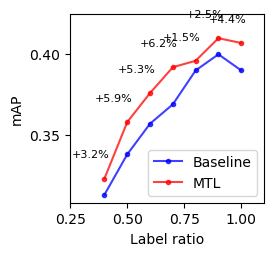

/home/ubuntu/cactus/outputs/figures/toys_label_ratio.pdf


In [16]:
for dataset, res_dict in map_dict.items():
    # for dataset, res_dict in map_dict.items():
    fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=100)
    plt.locator_params(axis='y', nbins=4)
    ax.plot(res_dict["label_ratio"], res_dict["baseline"], "-o", label='Baseline', color="blue",markersize=3,alpha=0.75,)
    ax.plot(res_dict["label_ratio"], res_dict["cf"], "-o", label='MTL',color="red",markersize=3,alpha=0.75,)

    texts = []
    for i, value in enumerate(res_dict["improvement"]):
        x, y = res_dict["label_ratio"][i], res_dict["cf"][i]
        value_precentage = value * 100 - 100
        value_str = "{}{:.1f}%".format('+' if value_precentage>0 else '-',value_precentage)
        text = plt.annotate(
            value_str,  # this is the text
            (x, y),  # these are the coordinates to position the label
            textcoords="offset points",  # how to position the text
            xytext=(-10, 15),  # distance from text to points (x,y)
            ha="center",
            size=8,
        )  # hoizontal alignment can be left, right or center
        texts.append(text)

    ax.set_xlabel("Label ratio")
    ax.set_ylabel("mAP")
    map_max = np.max([res_dict["cf"],res_dict["baseline"]])
    map_min = np.min([res_dict["cf"],res_dict["baseline"]])
    ax.set_ylim(map_min-0.005,map_max+0.015)
    ax.set_xlim(res_dict["label_ratio"][0]-0.15,res_dict["label_ratio"][-1]+0.1)
    ax.legend()
    # plt.tight_layout()
    out_path =osp.join(out_dir,'toys_label_ratio.pdf')
    plt.savefig(out_path)
    plt.show()
    print(osp.abspath(out_path))
